<a href="https://colab.research.google.com/github/Muttayyab-13/Machine-Learning/blob/main/OCR_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing important libraries


In [1]:
!pip install  pdf2image matplotlib opencv-python

!pip install paddlepaddle

!pip install paddlepaddle paddleocr

!apt-get install -y poppler-utils


# PADDLE OCR (not fine tuned )

In [5]:
import os
from paddleocr import PaddleOCR
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Initialize PaddleOCR
ocr = PaddleOCR(use_angle_cls=True, lang="en")

def pdf_to_image(pdf_path, dpi=300):
    """Convert PDF to Image (first page only)."""
    images = convert_from_path(pdf_path, dpi=dpi)
    return images[0]  # Return first page as an image

def perform_ocr(image):
    """Perform OCR using PaddleOCR."""
    image_np = np.array(image)  # Convert PIL Image to NumPy array
    results = ocr.ocr(image_np)  # Run OCR

    extracted_text = []
    for result in results[0]:  # Loop through detected text
        text = result[1][0]  # Extract recognized text
        confidence = result[1][1]  # Extract confidence score
        extracted_text.append({"text": text, "confidence": round(confidence, 2)})

    return extracted_text

def process_file(file_path):
    """Check if file is an image or PDF and process accordingly."""
    file_ext = os.path.splitext(file_path)[1].lower()

    if file_ext in [".pdf"]:
        print("\n Detected PDF! Converting to image...")
        image = pdf_to_image(file_path)  # Convert PDF to image

    elif file_ext in [".jpg", ".jpeg", ".png", ".bmp", ".tiff"]:
        print("\n Detected Image! Processing directly...")
        image = Image.open(file_path)  # Open image directly

    else:
        print("❌ Unsupported file type! Please use PDF or an image.")
        return

    # Display the Image
    plt.imshow(image)
    plt.axis("off")
    plt.show()

    # Perform OCR
    ocr_results = perform_ocr(image)

    # Print Extracted Text with Confidence Scores
    print("\n--- Extracted Text with Confidence Scores ---")
    for entry in ocr_results:
        print(f"Text: {entry['text']} | Confidence: {entry['confidence']}")




download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 3910/3910 [00:15<00:00, 247.94it/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10000/10000 [00:17<00:00, 562.71it/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2138/2138 [00:15<00:00, 135.34it/s]

[2025/02/14 06:21:50] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_c


📄 Detected PDF! Converting to image...


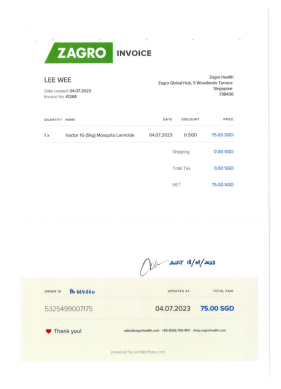

[2025/02/14 06:24:41] ppocr DEBUG: dt_boxes num : 36, elapsed : 0.1427769660949707
[2025/02/14 06:24:41] ppocr DEBUG: cls num  : 36, elapsed : 0.053165435791015625
[2025/02/14 06:24:43] ppocr DEBUG: rec_res num  : 36, elapsed : 2.0162410736083984

--- Extracted Text with Confidence Scores ---
Text: ZAGRO | Confidence: 1.0
Text: INVOICE | Confidence: 1.0
Text: Zagro Health | Confidence: 0.96
Text: LEE WEE | Confidence: 0.95
Text: Zagro Global Hub, 5 Woodlands Terrace | Confidence: 0.98
Text: Singapore | Confidence: 1.0
Text: Date created:04.07.2023 | Confidence: 0.98
Text: 738430 | Confidence: 1.0
Text: Invoice No: #1268 | Confidence: 0.97
Text: DATE | Confidence: 1.0
Text: DISCOUNT | Confidence: 1.0
Text: PRICE | Confidence: 1.0
Text: QUANTITY NAME | Confidence: 0.97
Text: 1x | Confidence: 0.94
Text: Vactor 1G (5kg)Mosquito Larvicide | Confidence: 0.96
Text: 04.07.2023 | Confidence: 1.0
Text: 0 SGD | Confidence: 0.85
Text: 75.00 SGD | Confidence: 0.95
Text: Shipping | Confidence: 1.0
T

In [7]:
# Provide the file path (PDF or Image)
file_path = "/content/ZAGRO HEALTH #1268 _ PO 664660 PC.pdf"  # Change this to your file path
process_file(file_path)